# Statistical and numerical methods in cosmology
# HW #1 
### *Hernán E. Noriega B.*
### Instituto de Física, Universidad Nacional Autónoma de México

In [1]:
import numpy as np
import math
from sympy import integrate
from scipy.integrate import quad
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## Exercise 1: Generate distances

 Comoving $(\chi(z))$, angular $(D_A(z))$ and luminosity $(D_L(z))$ distances

$$\chi (z)=\frac { c }{ { H }_{ 0 } } \int _{ 0 }^{ { z }_{ emi } }{ \frac { dz }{ \sqrt { { \Omega  }_{ m,0 }{ \left( 1+z \right)  }^{ 3 }+{ \Omega  }_{ r,0 }{ \left( 1+z \right)  }^{ 4 }+{ \Omega  }_{ \Lambda ,0 } }  }  } $$

$$D_A(z)= \frac { \chi (z) }{ 1+z } ,    \quad  \quad D_L=(1+z)\chi (z)  $$ 

Note: In this code O's:Omegas (m:matter, r: radiation, l:cosmological const), H0: Hubble's constant [Km/s/Mpc], c:speed of light [Km/s]



In [2]:
#Using trapezium rule for integrate

#f(z, Om, Or, Ol) is the function to be integrated (it's the argument of chi)
def f(z, Om, Or, Ol): 
    return 10**(-3)*(c/H0)/(math.sqrt(Om*(1+z)**3+Or*(1+z)**4+Ol)) ##10^(-3) is the convertion factor Mpc->Gpc
 
#define a function to do integration of f(z, ...,Ol) between [a,z]:
def chi(f, n, a, z):
    h = (z-a) / float(n) #width
    intgr = 0.5 * h * (f(a, Om, Or, Ol) + f(z, Om, Or, Ol)) #width times the average height
    
    #we add to get the "total amoung"
    for i in range(1, int(n)):
        intgr = intgr + h * f(a+i * h, Om, Or, Ol)
    return intgr

#we define the angular distance as "DA"
def DA(f, n, a, z):
    return chi(f, n, a, z)/(1+z)

#We define the luminosity distance as "DL"
def DL(f, n, a, z):
    return (1+z)*chi(f, n, a, z) 



### Cosmology 1 $(\Lambda CDM)$

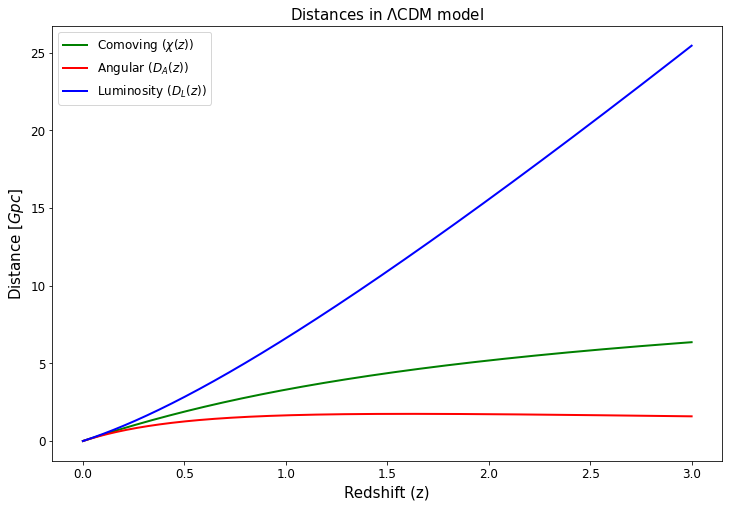

In [3]:
#Conditions (LCDM), O's:Omegas, H0: Hubble's constant, c:speed of light
Or = 0
Om = 0.3
Ol = 0.7
H0 = 70 #Units: (Km/s)/Mpc
c=300000 #Units: Km/s


z0 = 0 #redshift at z=0 
zf = 3 #redshift at z=3
zs = np.linspace(z0, zf, 1000) #zs [0,3]
Chi_plot = np.linspace(z0, zf, 1000)
DA_plot = np.linspace(z0, zf, 1000)
DL_plot = np.linspace(z0, zf, 1000)


plt.figure(figsize = (12,8))
plt.title(r'Distances in $\Lambda$CDM model ',fontsize=15)
plt.xlabel(r'Redshift (z)',fontsize=15)
plt.ylabel(r'Distance [$Gpc$]',fontsize=15)


for ii in range(len(zs)):
    Chi_plot[ii] = chi(f,len(zs),z0,zs[ii])
    DA_plot[ii] = DA(f,len(zs),z0,zs[ii])
    DL_plot[ii] = DL(f,len(zs),z0,zs[ii])

        
plt.plot(zs,Chi_plot,color='green',ls='-',lw=2,label=r'Comoving $(\chi(z))$')
plt.plot(zs,DA_plot,color='red',ls='-',lw=2,label=r'Angular $(D_A(z))$')
plt.plot(zs,DL_plot,color='blue',ls='-',lw=2,label=r'Luminosity $(D_L(z))$')

plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



####  comparison between python integration function and trapezoid rule

Here we compare for a specific value of the comoving distance. We conclude that the results are pretty similar.

In [4]:
#Using python eqs -- scipy

#We define the argument of chi function as "chiarg"
def chiarg(z):
    return 10**(-3)*(c/H0)/(math.sqrt(Om*(1+z)**3+Or*(1+z)**4+Ol))##10^(-3) is the convertion factor Mpc->Gpc

#we integrate to obtain "Chi"
def Chi(z):
    return quad(chiarg,0,z)[0] # [0] means that we only take the value Chi(z)

print('Using scipy = ', Chi(3))
print('Using trapezium =', chi(f,1000,0,3))

Using scipy =  6.360085385767908
Using trapezium = 6.36008657149935


### Cosmology 2 $(EdS)$

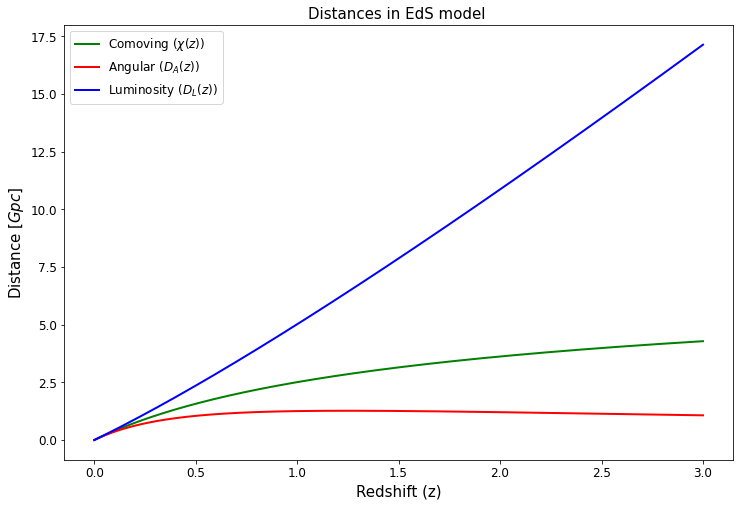

In [5]:
#Conditions (EdS), O's:Omegas, H0: Hubble's constant, c:speed of light
Or = 0
Om = 1
Ol = 0
H0 = 70 #Units: (Km/s)/Mpc
c=300000 #Units: Km/s


z0 = 0 #redshift at z=0 
zf = 3 #redshift at z=3
zs = np.linspace(z0, zf, 1000) 
Chi_plot = np.linspace(z0, zf, 1000)
DA_plot = np.linspace(z0, zf, 1000)
DL_plot = np.linspace(z0, zf, 1000)


plt.figure(figsize = (12,8))
plt.title(r'Distances in EdS model ',fontsize=15)
plt.xlabel(r'Redshift (z)',fontsize=15)
plt.ylabel(r'Distance [$Gpc$]',fontsize=15)


for ii in range(len(zs)):
    Chi_plot[ii] = chi(f,len(zs),z0,zs[ii])
    DA_plot[ii] = DA(f,len(zs),z0,zs[ii])
    DL_plot[ii] = DL(f,len(zs),z0,zs[ii])

        
plt.plot(zs,Chi_plot,color='green',ls='-',lw=2,label=r'Comoving $(\chi(z))$')
plt.plot(zs,DA_plot,color='red',ls='-',lw=2,label=r'Angular $(D_A(z))$')
plt.plot(zs,DL_plot,color='blue',ls='-',lw=2,label=r'Luminosity $(D_L(z))$')

plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


## Exercise 2: Compare with real data from Supernovae

We define the distance modulus as,

$$\mu (z) = m(z)- M= 5\log _{ 10 }{ \left( \frac { { D }_{ L }(z) }{ 10 pc }  \right)  }$$ 

where ${ D }_{ L }(z)$ is the luminosity distance of a given cosmological model (expressed in $pc$)

you can read more about it in
https://astronomy.swin.edu.au/cosmos/D/Distance+Modulus

### PANTHEON survey (data)

In [6]:
z_d,mu_d=np.loadtxt('Data_SNIa_mu.txt',usecols=(0,1),unpack=True) #Import PANTHEON data

#z_d reads z
#mu_d reads \mu

### $(a)$  Calculate $\mu(z)$ for $\Lambda CDM$ and $EdS$ models

In [7]:
#We define the distance modulus as "mu"

def mu(f, n, a, z):
    return 5*np.log10(DL(f, n, a, z)*10**9/10) #the number "10⁹" comes from the convertion "Gp->pc" (1Gp->10⁹ pc)

#using this function you can calculate the distance modulus for the cosmological model you want!!! 

#### Cosmology 1 $(\Lambda CDM)$


In [8]:
#Conditions (LCDM), O's:Omegas, H0: Hubble's constant, c:speed of light
Or = 0
Om = 0.3
Ol = 0.7
H0 = 70 #Units: (Km/s)/Mpc
c=300000 #Units: Km/s


z0 = 0 #redshift at z=0 
zf = 3 #redshift at z=3
zs = np.linspace(z_d[0], zf, 1000)#zs[z_d[0],3] where z_d[0]=0.014 (we don't take "0" to avoid log(0))

muc1_plot = np.zeros(len(zs)) #muc1: mu(z) for cosmology 1
for ii in range(len(zs)):
    muc1_plot[ii] = mu(f,len(zs),z0,zs[ii])

#### Cosmology 2 $(EdS)$


In [9]:
#Conditions (LCDM), O's:Omegas, H0: Hubble's constant, c:speed of light
Or = 0
Om = 1
Ol = 0
H0 = 70 #Units: (Km/s)/Mpc
c=300000 #Units: Km/s


z0 = 0 #redshift at z=0 
zf = 3 #redshift at z=3
zs = np.linspace(z_d[0], zf, 1000)#zs[z_d[0],3] where z_d[0]=0.014 (we don't take "0" to avoid log(0))

muc2_plot = np.zeros(len(zs)) #muc2: mu(z) for cosmology 2
for ii in range(len(zs)):
    muc2_plot[ii] = mu(f,len(zs),z0,zs[ii])

### $(b)$  Plot $\mu(z)$  for $\Lambda CDM$ and $EdS$ models in $z \hspace{0.1cm} \epsilon \hspace{0.1cm}  \left[ 0,3 \right]$ 

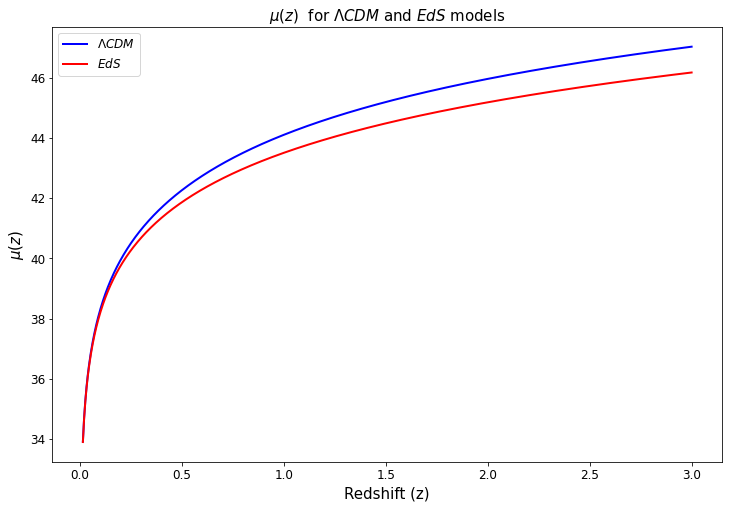

In [10]:
plt.figure(figsize = (12,8))
plt.title(r'$\mu (z)$  for $\Lambda CDM$ and $EdS$ models',fontsize=15)
plt.xlabel(r'Redshift (z)',fontsize=15)
plt.ylabel(r'$\mu(z)$',fontsize=15)

        
plt.plot(zs,muc1_plot,color='blue',ls='-',lw=2,label=r'$\Lambda CDM$')
plt.plot(zs,muc2_plot,color='red',ls='-',lw=2,label=r'$EdS$')

plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### $(c)$  Plot $\mu(z)$  for $\Lambda CDM$ , $EdS$ models and PANTHEON data in $z \hspace{0.1cm} \epsilon \hspace{0.1cm}  \left[ 0,3 \right]$ 

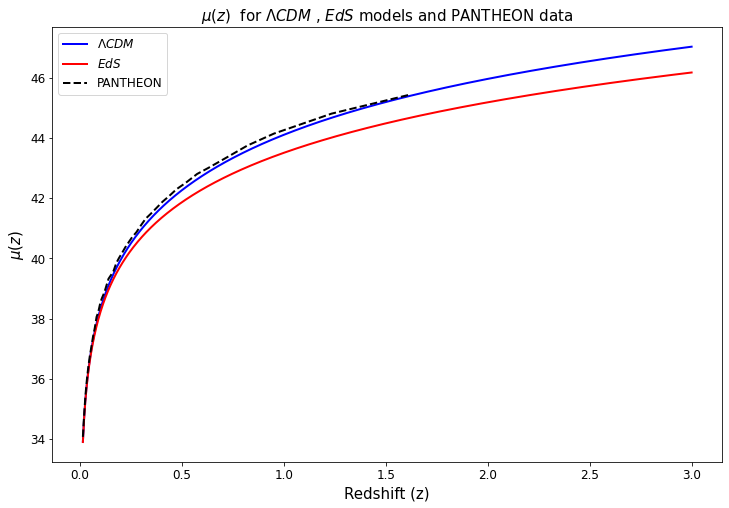

In [11]:
plt.figure(figsize = (12,8))
plt.title(r'$\mu (z)$  for $\Lambda CDM$ , $EdS$ models and PANTHEON data',fontsize=15)
plt.xlabel(r'Redshift (z)',fontsize=15)
plt.ylabel(r'$\mu(z)$',fontsize=15)

        
plt.plot(zs,muc1_plot,color='blue',ls='-',lw=2,label=r'$\Lambda CDM$')
plt.plot(zs,muc2_plot,color='red',ls='-',lw=2,label=r'$EdS$')
plt.plot(z_d,mu_d,color='black',ls='--',lw=2,label=r'PANTHEON')



plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### $(d)$ Which model seems to better fit the data? What can you say about the need of the cosmological constant Λ (or the Dark Energy)?

From the above figure it is clear that the $\Lambda CDM$ model better fit the data, this show us that in order to explain this discrepancy (in this case) between the $EdS$ model and the PANTHEON data, we need to introduce a new substance, the Dark Energy (DE). By the way, the study of type Ia Supernova (SNIa) was historically  very important in the discovery that our universe is expanding (existence of  DE). 


the following paragraphs,


"The surprise discovery was evidence that the expansion of the universe has been accelerating. It earned Perlmutter, Riess and Schmidt the 2011 Nobel Prize for Physics"

"The two teams came to this conclusion by studying type Ia supernova where they found that the light from over 50 distant supernovae was weaker than expected. This was a sign that the expansion of the universe was accelerating" 

were taken from physicsworld (IOP), see:

https://physicsworld.com/a/supernovae-analysis-finds-scant-evidence-for-dark-energy/#:~:text=The%20teams%20found%20that%20more,wavelengths%20when%20observed%20on%20Earth.

https://physicsworld.com/a/dark-energy-pioneers-scoop-nobel-prize/

## Exercise 3 : Density evolution

We consider a cosmological model in which:

$$\Omega_{m,0}=0.2999, \quad  \quad \Omega_{\Lambda,0}=0.7, \quad  \quad \Omega_{r,0}=0.0001$$

In [12]:
#we set the values for the cosmological model
Om0 = 0.2999 #matter
Ol0 = 0.7    #cosmological constant
Or0 = 0.0001 #radiation

Using the fact that,

${ \rho  }_{ i }={ \rho  }_{ i,0 }{ a }^{ -3\left( 1+{ w }_{ i } \right)  }$, where: $w_{\Lambda}=-1, \hspace{0.2cm} w_{m}=0$, $\hspace{0.2 cm} w_{r}=1/3$ 

$\Omega_{i,0}=\frac{\rho _{i,0}}{\rho _{c,0}}$, where $\rho _{c,0}$ is the critical density (the subscript (,0) means at the present, -today-)

$a=\frac{1}{1+z}$

### (1) Determine the redshift/scale factor of equivalence between $\Omega_{\Lambda}$ and $\Omega_{m}$

From the above equations, we can find: 
$${ z }_{ eq }^{ \Lambda ,m }={ \left( \frac { { \Omega  }_{ \Lambda ,0 } }{ { \Omega  }_{ m,0 } }  \right)  }^{ 1/3 }-1$$

In [13]:
zlm=(Ol0/Om0)**(1/3)-1
print("Dark energy-matter equality epoch: Redshift")
print("Zeq(l,m):",zlm) 

Dark energy-matter equality epoch: Redshift
Zeq(l,m): 0.32649980787924693


In [14]:
alm=1/(1+zlm)
print("Dark energy-matter equality epoch: Scale factor")
print("aeq(l,m):",alm) 

Dark energy-matter equality epoch: Scale factor
aeq(l,m): 0.7538636598815334


### (2) Determine the redshift/scale factor of equivalence between $\Omega_{r}$ and $\Omega_{m}$

From the above equations, we can find: 
$${ z }_{ eq }^{ r ,m }={  \frac { { \Omega  }_{ m ,0 } }{ { \Omega  }_{ r,0 } }    }-1$$

In [15]:
zrm=(Om0/Or0)-1
print("Matter-radiation equality epoch: Redshift")
print("Zeq(r,m):",zrm) 

Matter-radiation equality epoch: Redshift
Zeq(r,m): 2998.0


In [16]:
arm=1/(1+zrm)
print("Matter-radiation equality epoch: Scale factor")
print("aeq(r,m):",arm) 

Matter-radiation equality epoch: Scale factor
aeq(r,m): 0.00033344448149383126


### (3) Determine the evolution of $a(t)$ for the era of domination of the 3 components (the power law)

we know that: $a_{i} (t) \propto t^{\frac{2}{3(1+w_{i})}}$ for ${ w }_{ i }\neq -1$


radiation: $a_{r} (t)\propto t^{1/2}$ $\quad$ matter: $a_{m} (t) \propto t^{2/3}$ $\quad$ dark energy: $a_{\Lambda} (t) \propto { e }^{ { H }_{ 0 }\sqrt { { \Omega  }_{ \Lambda ,0 } } \hspace{0.1cm} t }$

In [17]:
H0=(70*10**9)/(9.77813106*10**11) #Hubble constant in Gigayears (Gyrs)

def ar(t):
    return t**(1/2)

def am(t):
    return t**(2/3)

def al(t):
    return np.exp(t*H0*np.sqrt(Ol0))

### (4) Determine the evolution of $ρ_{m}(t)$ for the era of domination of the 3 components

The evolution of $\rho_{m} (t)$ can be obtained by integrating the continuity eq,

$$\rho_{m} (t)= \rho_{m,0} a^{-3}$$

where $a=a(t)$ is the scale factor in each era domination. So the $\rho_{m}(t)$ evolution in each epoch is, 

$${ \rho  }_{ m }^{ r }=\Omega_{m,0} \rho_{m,0} t^{-3/2}$$
$${ \rho  }_{ m }^{ m }=c_{1} \Omega_{m,0} \rho_{m,0} t^{-2}$$
$${ \rho  }_{ m }^{ \Lambda }=c_{2} \Omega_{m,0} \rho_{m,0} { e }^{ -3{ H }_{ 0 }\sqrt { { \Omega  }_{ \Lambda ,0 } } t }$$

the upper index means the epoch in which $\rho_{m}$ is involve, while $c_1$ and $c_2$ are constant that guarantees continuty


In [18]:
# rho_me, where 'm' refers to matter and 'e' to the epoch
rho_0 = 10**(-26) #[kg/m3]


def rho_mr(t):
    return rho_0*Om0*(ar(t))**(-3) 

def rho_mm(t):
    return rho_0*c1*Om0*(am(t))**(-3) 

def rho_ml(t):
    return rho_0*c2*Om0*(al(t))**(-3)

### (5) Convert the $a_{eq}$ in the corresponding look-back time

Look-Back time,

$$t_{0}-t_{*}=\int_0^{z_{*}} \frac{1}{(z+1) H(z)} \, dz$$

where: $t_{0}$ is the age of the universe today and,, $$H(z)=H_{0} \sqrt{\text{$\Omega_{\Lambda,0} $}+\text{$\Omega_{m,0} $} (z+1)^3+\text{$\Omega_{r,0} $} (z+1)^4}$$

see: SPACETIME AND GEOMETRY - Sean Carroll, p. 349

In [19]:
#Using trapezium rule for integrate

#lbt(z) is the Lookback-time
def lbt(z): 
    return (1/H0)/(math.sqrt(Om0*(1+z)**3+Or0*(1+z)**4+Ol0)*(1+z))

##integration of "lbt" between [a,z] -- (lbtint means lookback-time integration)
def lbtint(lbt, n, a, z):
    h = (z-a) / float(n) #width
    intgr = 0.5 * h * (lbt(a) + lbt(z)) #width times the average height
    
    #we add to get the "total amoung"
    for i in range(1, int(n)):
        intgr = intgr + h * lbt(a+i * h)
    return intgr


In [20]:
#we get the result of each integration
# for high redshift (as zrm=2998) more points are needed, so we use 500k points in both.
points = 5*10**5

lbtlm = lbtint(lbt, points, 0, zlm) #lbtlm means lbt for l-m equality (lambda - matter)

lbtrm = lbtint(lbt, points, 0, zrm) #lbtrm means lbt for r-m equality (radiation-matter)

print('Lookback-time')

print('t(l,m):',lbtlm,'(Gyrs)') 
print('t(r,m):',lbtrm, '(Gyrs)')


Lookback-time
t(l,m): 3.6583505420054303 (Gyrs)
t(r,m): 13.462343053778877 (Gyrs)


#### In order to compare we do the same, but using a python function

In [21]:
def LBT(z):
    return quad(lbt,0,z)[0] # [0] means that we only take the value Chi(z)

print('Lookback-time (Gyrs)')
print('t(l,m) = ', LBT(zlm))
print('t(r,m) = ', LBT(zrm))

Lookback-time (Gyrs)
t(l,m) =  3.6583505420051283
t(r,m) =  13.462282368739618


### (6) Plot the evolution of $ρ(t)$ with the time in log-log scale for the period corresponding to $z = 0$ up to $z = 10000$ considering the different eras

In [22]:
zf = 10000
zi = 0

lbt_zf = lbtint(lbt, points, 0, zf) #lookback-time for zf=10000
lbt_zi = lbtint(lbt, points, 0, zi) #lookback-time for zi=0
t0 = lbtint(lbt,points,0,100000) #universe's age
print('Lookback-time,')
print('t(z=1000):',lbt_zf, '(Gyrs)') #along time ago ( when "chabelo" was born lol )
print('t(z=0):',lbt_zi, '(Gyrs)') #today
print('Universe age :',t0, '(Gyrs)') #Age of universe


Lookback-time,
t(z=1000): 13.46301179840978 (Gyrs)
t(z=0): 0.0 (Gyrs)
Universe age : 13.529665050280585 (Gyrs)


It is convenient to express the $t$-axis in $Gyrs$

We change from lookback-time to cosmic time, that is today's time is the universe's age, $t(z=0)=t_0$

In [23]:
#changing from lookback-time to cosmic time

t4=t0-lbt_zi #cosmic time of z=1000
t3=t0-lbtlm  #cosmic time when occurs (l,m) equality
t2=t0-lbtrm  #cosmic time when occurs (r,m) equality
t1=0         #the begining, the singularity

In [24]:
#we create the time interval
t = np.linspace(t1,t4,1000)  


#we write down c1 and c2
c1 = np.sqrt(t2)
c2 = c1*(t3)**(-2)*np.exp(3*H0*np.sqrt(Ol0)*t3)


In [25]:
#we define the rho function appropriately in each region

def rho(t):
    if ((t < t2) and (t >= t1)):
        return rho_mr(t)
    if ((t < t3) and (t >= t2)):
        return rho_mm(t)
    if ((t <= t4) and (t >= t3)): 
        return rho_ml(t)

<ipython-input-18-8717e185f5f8>:6: RuntimeWarning: divide by zero encountered in double_scalars
  return rho_0*Om0*(ar(t))**(-3)


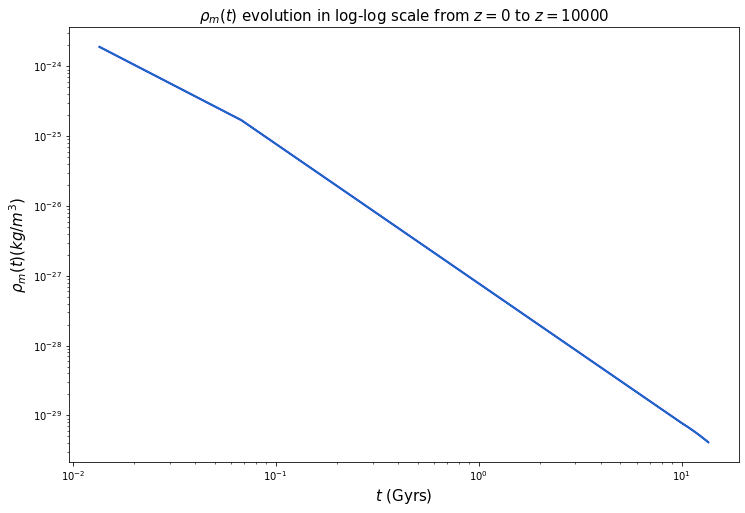

In [26]:
plt.figure(figsize = (12,8))
plt.title(r'$\rho_m(t)$ evolution in log-log scale from $z=0$ to $z=10000$',fontsize=15)
plt.xlabel(r'$t$ (Gyrs)',fontsize=15)
plt.ylabel(r'$\rho_m(t) (kg/m^{3})$',fontsize=15)


rho_p = np.zeros(len(t)) 
for ii in range(len(t)):
    rho_p[ii] = rho(t[ii])

plt.plot(t,rho_p,color='blue',ls='-',lw=2)
plt.loglog(t,rho_p)

#plt.semilogy()


plt.show()


From left to right:  Radiation epoch, matter epoch, and cosmological constant epoch